<a href="https://colab.research.google.com/github/John-ani/Heart-Failure/blob/main/HeartFailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***PROBLEM STATEMENT***

Heart failure is a serious medical condition that can result in hospitalization and even death. Early discovery of heart failure is crucial for timely intervention and improved outcomes. However, accurately predicting the risk of heart failure can be challenging. Logistic regression is a statistical technique that can be used to model binary outcomes, making it a promising approach for heart failure prediction. The problem statement for heart failure prediction using logistic regression is to develop a reliable model that can accurately predict the likelihood of heart failure in individuals based on their medical history, lifestyle factors, and other relevant clinical variables. This model should be validated on a large and diverse dataset to ensure its generalizability and usefulness in clinical practice.

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

### ***STEP 1: LIB IMPORT***

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mounting Google Drive if working in Google Colab
# Note: Uncomment the following lines if you're using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Displaying content of the dataset
# Assuming dataset is stored in Google Drive, change the file path accordingly
df = pd.read_excel('/content/drive/MyDrive/heart_failure_clinical_records_dataset.xlsx')


Mounted at /content/drive


### ***STEP 2: EDA***

In [ ]:
# EDA (Exploratory Data Analysis)
# Displaying first few rows of the dataset
print(df.head())

# Checking dataset information
print(df.info())

# Summary statistics
print(df.describe())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

### ***STEP 3: DATA VISUALISATION***

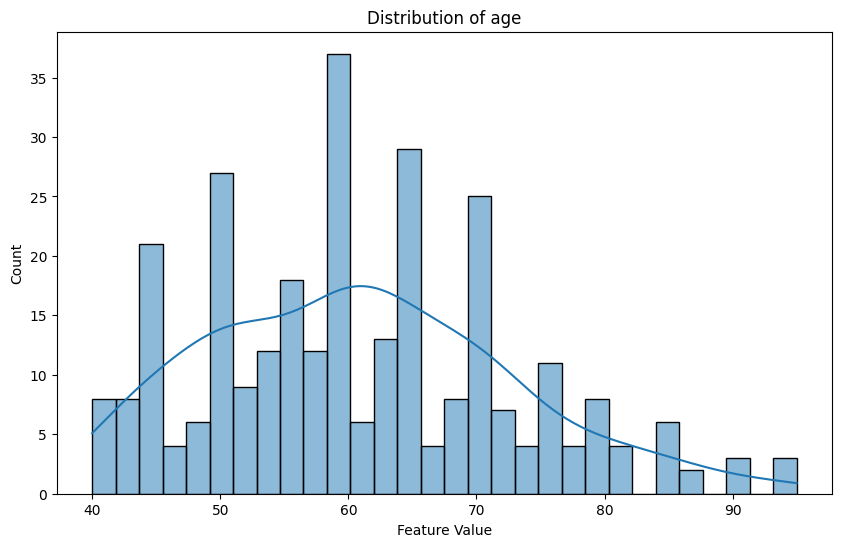

In [ ]:
# Visualizing different parameters
# Example: Plotting a histogram of a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of age')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.show()

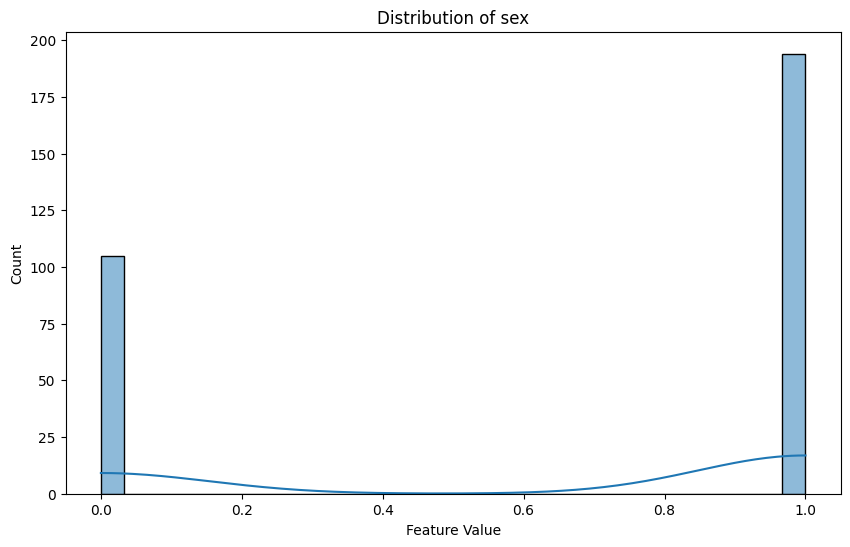

In [ ]:
# Visualizing different parameters
# Example: Plotting a histogram of a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(df['sex'], bins=30, kde=True)
plt.title('Distribution of sex')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.show()

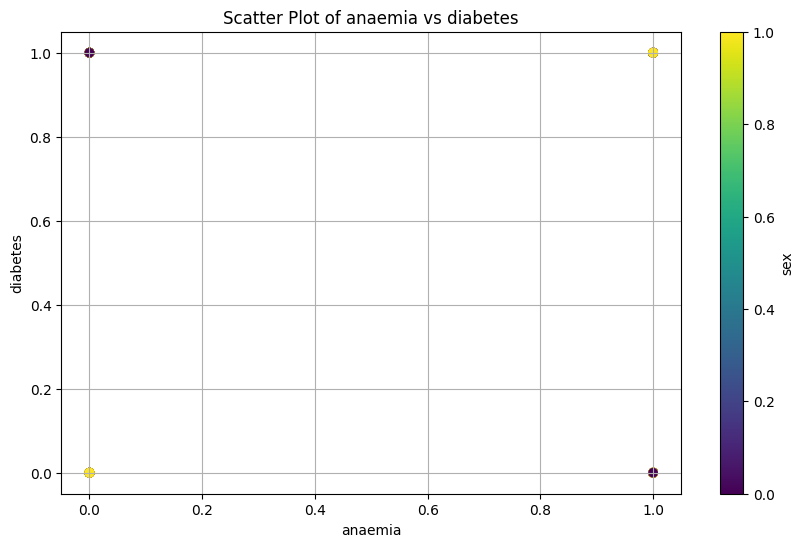

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame containing the dataset

# Scatter plot of two variables
plt.figure(figsize=(10, 6))
plt.scatter(df['anaemia'], df['diabetes'], c=df['sex'], cmap='viridis')
plt.title('Scatter Plot of anaemia vs diabetes')
plt.xlabel('anaemia')
plt.ylabel('diabetes')
plt.colorbar(label='sex')
plt.grid(True)
plt.show()

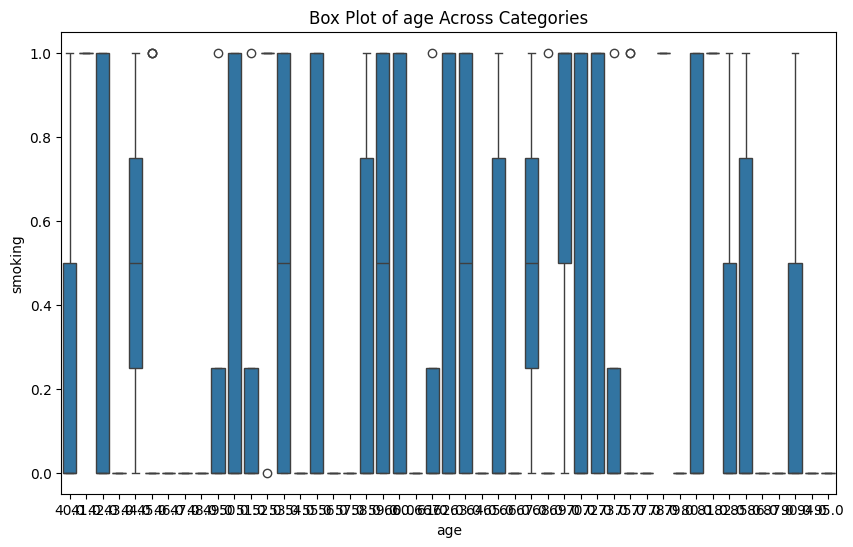

In [ ]:
# Box plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='smoking', data=df)
plt.title('Box Plot of age Across Categories')
plt.xlabel('age')
plt.ylabel('smoking')
plt.show()

### ***STEP 4: DATA TRAINING***

In [ ]:
# Splitting the dataset into train and test sets
X = df.drop('sex', axis=1)  # Features
y = df['sex']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the Logistic Regression classifier
classifier = LogisticRegression()

# Perform necessary conversions (e.g., scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

### ***STEP 5: MODEL BUILDING***

In [ ]:
# Test the trained model
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
# Printing the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:", class_report)

Accuracy: 0.7833333333333333
Confusion Matrix:
 [[15  5]
 [ 8 32]]
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.86      0.80      0.83        40

    accuracy                           0.78        60
   macro avg       0.76      0.78      0.76        60
weighted avg       0.79      0.78      0.79        60

